In [0]:
from keras import models, layers

In [0]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [8]:
train_labels.shape

(25000,)

In [0]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [11]:
y_train.shape

(25000,)

In [12]:
m = models.Sequential()
m.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
m.add(layers.Dense(16, activation='relu'))
m.add(layers.Dense(1, activation='sigmoid'))

m.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:] 

In [14]:
history = m.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 4s 258us/step - loss: 0.5278 - acc: 0.7792 - val_loss: 0.3979 - val_acc: 0.8637
Epoch 2/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.3128 - acc: 0.9010 - val_loss: 0.3324 - val_acc: 0.8698
Epoch 3/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.2324 - acc: 0.9235 - val_loss: 0.3216 - val_acc: 0.8674
Epoch 4/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1844 - acc: 0.9416 - val_loss: 0.2920 - val_acc: 0.8817
Epoch 5/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.1511 - acc: 0.9522 - val_loss: 0.2993 - val_acc: 0.8796
Epoch 6/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1261 - acc: 0.9604 - val_loss: 0.2893 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1056 - acc: 0.9674 - val_loss: 0

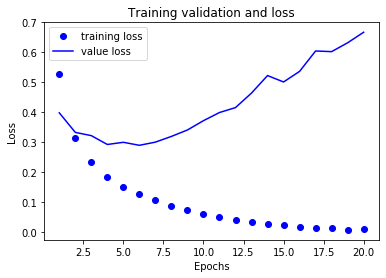

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label="training loss")
plt.plot(epochs, val_loss_values, 'b', label="value loss")
plt.title('Training validation and loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
m = models.Sequential()
m.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
m.add(layers.Dense(8, activation='relu'))
m.add(layers.Dense(1, activation='sigmoid'))

m.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
m.fit(x_train, y_train, epochs=4, batch_size=512)
results = m.evaluate(x_test, y_test)


Epoch 1/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.4529 - acc: 0.8254
Epoch 2/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.2596 - acc: 0.9076
Epoch 3/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.2038 - acc: 0.9268
Epoch 4/4
25000/25000 [==============================] - 4s 144us/step


TypeError: ignored

In [18]:
results

[0.30076472497940065, 0.88016]